In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("emails.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.shape

(5171, 4)

In [4]:
data['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [6]:
data['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [7]:
import seaborn as sns

C:\Users\bhoom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_num', ylabel='count'>

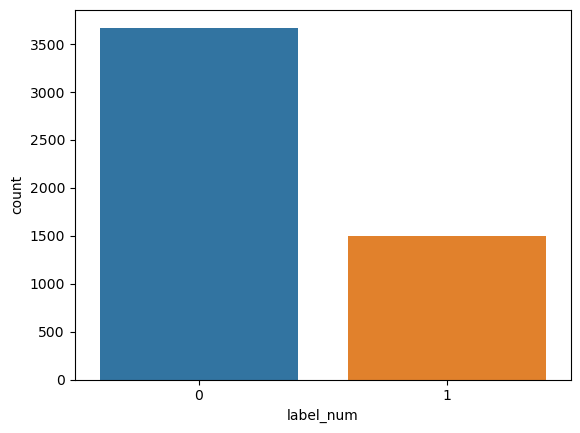

In [8]:
sns.countplot(data['label_num'])

In [9]:
data.duplicated().sum()

0

In [10]:
x=data['text'].values
y=data['label_num'].values

In [11]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state= 0)

In [23]:
x_train.shape

(4136,)

In [24]:
x_test.shape

(1035,)

In [25]:
y_train.shape

(4136,)

In [26]:
y_test.shape

(1035,)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer()

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [32]:
pipe = make_pipeline(cv, nb)

In [33]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [34]:
y_pred = pipe.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9729468599033816

In [39]:
email = ['Hey i am Elon Musk. Get a brand new car from tesla']
pipe.predict(email)

array([1], dtype=int64)

In [41]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))